# Predicting heart disease using machine learning

This exercise explores various Python-based machine learning and data science libraries in an attempt to build a machine learning model which is capable of predicting whether or not seomone has heart disease based on their medical attributes.

Source: UCI Mahine Learning Repository

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

> Given clinical parameters of a patient, can we predict whether or not he or she has heart disease?

## 2. Data

> The original data are pulled from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation

> If we can reach high accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

> Features are available on UCI datbase
https://archive.ics.uci.edu/ml/datasets/heart+Disease


In [188]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import models for evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [189]:
# Read data using Pandas dataframe
df = pd.read_csv("heart-disease.csv")

print("The shape of the data is "+ str(df.shape) + ". \nSample rows are printed below:")
df.head()

The shape of the data is (303, 14). 
Sample rows are printed below:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


<AxesSubplot:>

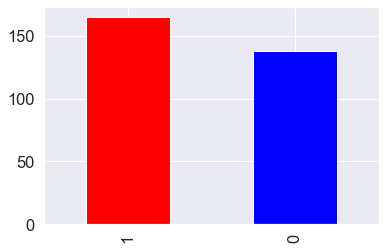

In [190]:
# Explore target's value distribution
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [191]:
# Check data availability and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [192]:
# Check if there's any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [193]:
# Continue exploring the data using describe() 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency based on Sex

In [194]:
# Keep exploring and compare target column with sex column
# For example, we find that female tends to have higher rate of heart disease
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

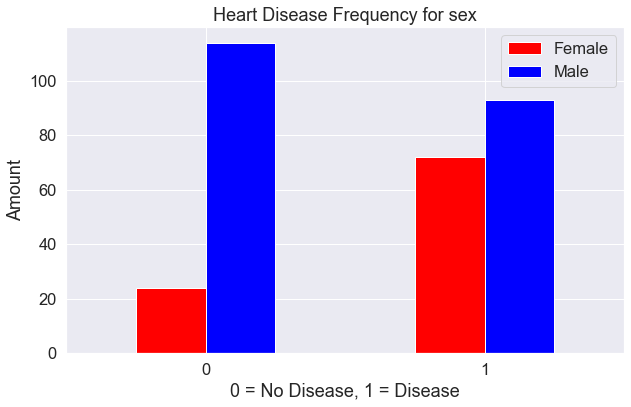

In [195]:
# Visualize our finding using crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

### Age vs. Max Heart Rate for Heart Disease

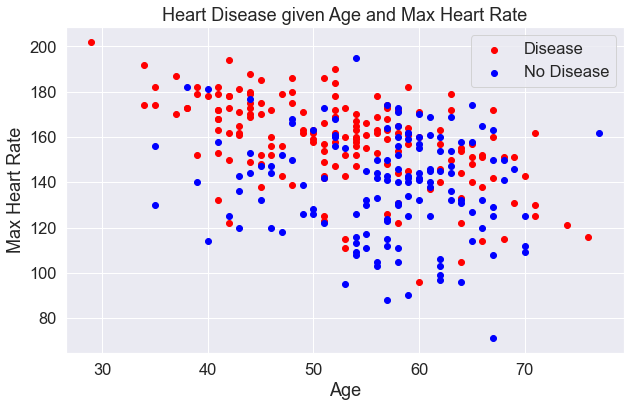

In [196]:
# Plot max heart rate against the target value
plt.figure(figsize=(10,6))

# Scatter positive target values with red color
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red"
           )

# Scatter negative target value with blue color
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="blue")

# Add some helpful info
plt.title("Heart Disease given Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

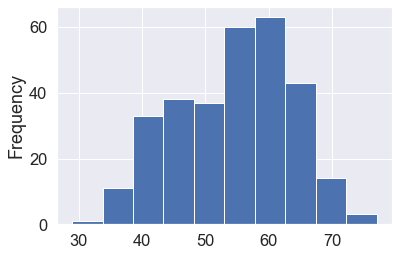

In [197]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease by Chest Pain Type

- 0: Typical angina
- 1: Atypical angina
- 2: Non-anginal pain
- 3: Asymptomatic

In [198]:
# Explore heart disease by chest pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

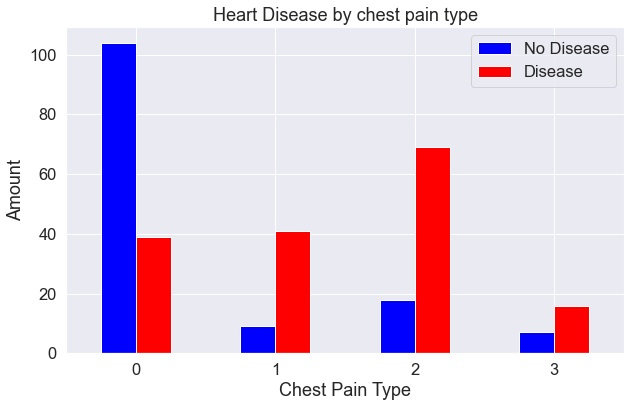

In [199]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue","red"])

plt.title("Heart Disease by chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [200]:
# Explore correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


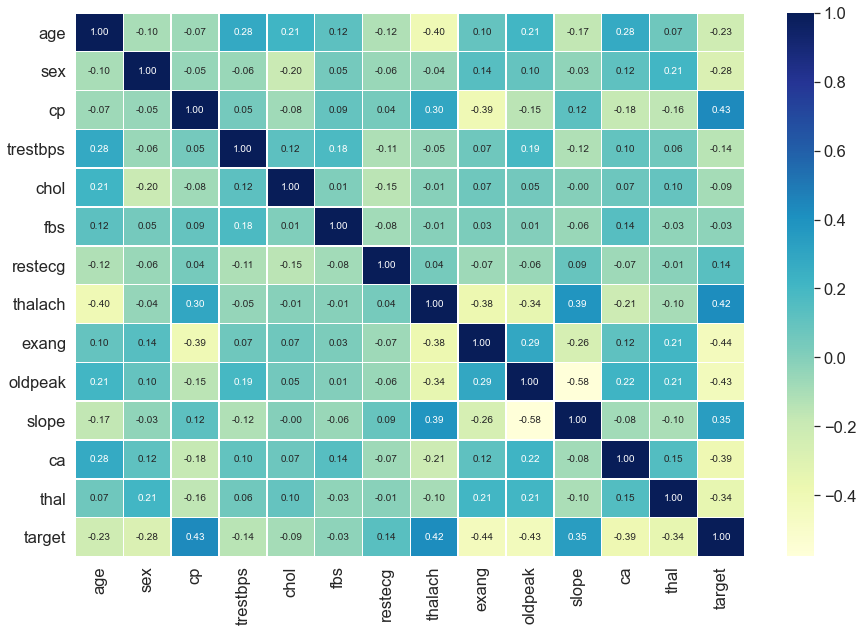

In [201]:
# Let's make our correlation matrix more visaul
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths =0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling

#### Evaluate using three different machine learning models:
1. Logistic Regression
2. K-nearest Neighbors Classifier
3. Random Forest Regression

In [202]:
# Set random seed to 0 so we can reproduce the outcome
np.random.seed(0)

In [203]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [204]:
# Put models in a dictionary so we can access later
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forect": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training data (labels only)
    y_test: testing data (labels only)
    '''
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [205]:
# Evaluate models without tuning
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\inves\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forect': 0.8524590163934426}

### Model comparison

<AxesSubplot:>

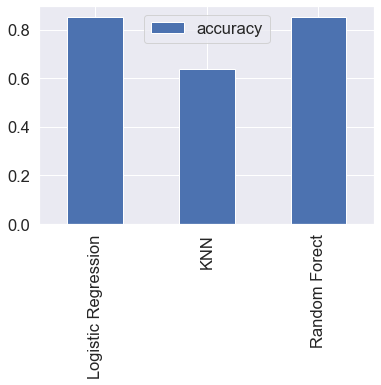

In [206]:
# Plot the machine learning models by accuracy
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

# Explore the following items to identiry possible improvements:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning trials

In [207]:
# Start tuning with KNN model
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 72.13%


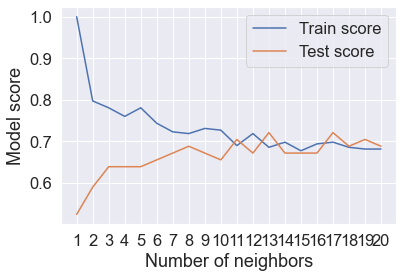

In [208]:
# Plot KNN scores with n-neighbor parameters
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

Tune the following machine learning models using randomizedSearchCV:
* LogisticRegression()
* RandomForestClassifier()

In [209]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [210]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [211]:
# Check best model's parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [212]:
# Check best model's score
rs_log_reg.score(X_train,y_train)

0.8429752066115702

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [213]:
# Setup random hyperparameter search for RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [214]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [215]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [216]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forect': 0.8524590163934426}

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [217]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [218]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [219]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_train,y_train)

0.8471074380165289

In [220]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forect': 0.8524590163934426}

## Evaluate our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [221]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [222]:
# Check out the predicted values
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

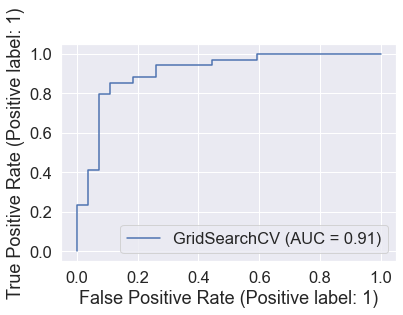

In [223]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [224]:
# Plot Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


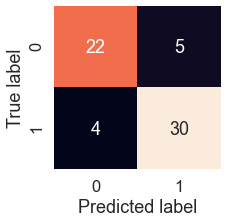

In [225]:
# Plot the confusion matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [226]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [227]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [228]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

In [229]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [230]:
cv_acc = np.mean(cv_acc)

In [231]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [232]:
# Cross-validated precision
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [233]:
# Cross-validated f-1 score
cv_f1 = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

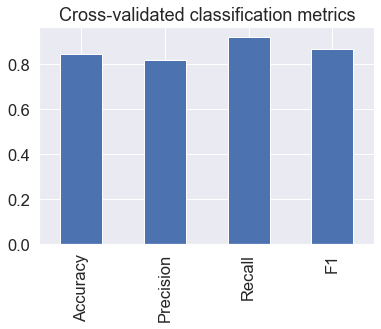

In [234]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend = False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression model...

In [235]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, 
                         solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [236]:
# Check coef_
clf.coef_

array([[ 0.00407775, -0.95728964,  0.63785997, -0.00948753, -0.0027512 ,
        -0.1661072 ,  0.15292919,  0.02677733, -0.57828877, -0.48950221,
         0.1540638 , -0.72894777, -0.54862498]])

In [237]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004077747859308126,
 'sex': -0.9572896398184151,
 'cp': 0.637859965566012,
 'trestbps': -0.009487525128653468,
 'chol': -0.00275119946181216,
 'fbs': -0.1661072047952176,
 'restecg': 0.1529291942100729,
 'thalach': 0.026777330240354977,
 'exang': -0.5782887708954897,
 'oldpeak': -0.4895022134188698,
 'slope': 0.15406380456776528,
 'ca': -0.7289477747874273,
 'thal': -0.5486249782781407}

<AxesSubplot:title={'center':'Feature Importance'}>

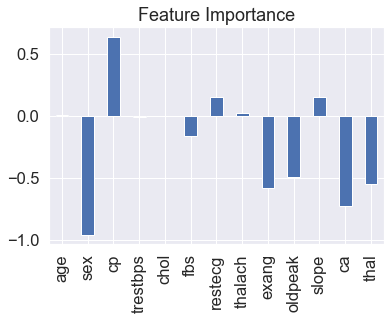

In [238]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [239]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [240]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
